# *Analysis 8: Appearances*

Let's visualize the data related to **player appearances** in a **match**.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '../')

In [2]:
df = pd.read_csv('../Datasets/appearances.csv')
df.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


By checking the columns, we understand that the represented data are as follows:
- **appearance_id**: Unique identifier for the player's appearance in a match. Used to distinguish each row as a unique entry.
- **game_id**: Unique identifier of the match. Each match has a specific ID.
- **player_id**: Unique identifier of the player. Each player has a specific ID.
- **player_club_id**: Unique identifier of the player's club during the match. This ID helps distinguish between different clubs.
- **player_current_club_id**: Unique identifier of the player's current club. This may differ from `player_club_id` if the player has changed clubs.
- **date**: Date when the match took place. Indicates the day the event occurred.
- **player_name**: Name of the player. The full name of the player.
- **competition_id**: Identifier of the competition. Each competition has a specific ID, e.g., 'CLQ' for Champions League qualifiers, 'ELQ' for Europa League qualifiers, etc.
- **yellow_cards**: Number of yellow cards received by the player in that match.
- **red_cards**: Number of red cards received by the player in that match.
- **goals**: Number of goals scored by the player in that match.
- **assists**: Number of assists made by the player in that match.
- **minutes_played**: Number of minutes played by the player in that match.


In [3]:
print('Numero di righe e colonne:', df.shape)

Numero di righe e colonne: (1507351, 13)


Obviously, this dataset is also used to __store data dynamically__,
as evidenced by the number of rows compared to static datasets.

Let's check the data types for each column: verify if the numerical data can provide us with useful information and how to handle missing data.


In [4]:
df.dtypes

appearance_id             object
game_id                    int64
player_id                  int64
player_club_id             int64
player_current_club_id     int64
date                      object
player_name               object
competition_id            object
yellow_cards               int64
red_cards                  int64
goals                      int64
assists                    int64
minutes_played             int64
dtype: object

Using describe is therefore useful, but first, let's handle the null values.


In [5]:
df.isnull().sum()

appearance_id               0
game_id                     0
player_id                   0
player_club_id              0
player_current_club_id      0
date                        0
player_name               324
competition_id              0
yellow_cards                0
red_cards                   0
goals                       0
assists                     0
minutes_played              0
dtype: int64

It is verified that the only field with null values is the player name, which is replaced with 'Unknown'.
Then, check that the replacement was successful.


In [6]:
df['player_name'] = df['player_name'].fillna('Unknown')
df.isnull().sum()

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               0
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64

The **describe** instruction can be useful given the presence of some **numerical** data such as yellow cards, red cards, goals, assists, and minutes played.


In [7]:
df.describe()

,game_id,player_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06
mean,3.014718e+06,1.798913e+05,2.881502e+03,3.638909e+03,1.490230e-01,3.827244e-03,9.635778e-02,7.431050e-02,6.964984e+01
std,5.570794e+05,1.652259e+05,7.113885e+03,9.309395e+03,3.675721e-01,6.174624e-02,3.318755e-01,2.834195e-01,2.976078e+01
min,2.211607e+06,1.000000e+01,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.518634e+06,5.369600e+04,2.890000e+02,3.360000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.200000e+01
50%,2.917390e+06,1.271420e+05,8.550000e+02,9.310000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
75%,3.450701e+06,2.608060e+05,2.441000e+03,2.687000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
max,4.227848e+06,1.186012e+06,8.367800e+04,8.367800e+04,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.200000e+02


In the **histogram** below, the **minutes played** by players in each match are shown.
Analyzing the chart, we notice that the **majority** of players typically play the entire match (**90 minutes**).


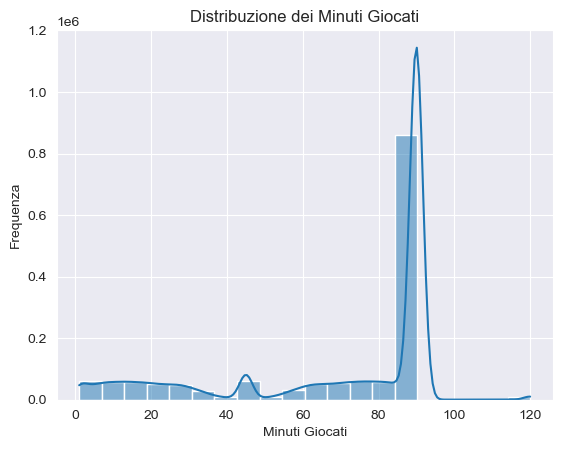

In [8]:
plt.figure()
sns.histplot(df['minutes_played'], bins=20, kde=True)
plt.title('Distribuzione dei Minuti Giocati')
plt.xlabel('Minuti Giocati')
plt.ylabel('Frequenza')
plt.show()

The charts below show the **distribution** of **yellow cards** and **red cards** received by players in the matches recorded in the **dataset**.
This **visualization** is useful for understanding how **cards** are distributed among players,
allowing us to identify any **trends** or **anomalies** in the distribution of **yellow** and **red cards**.
From the charts, we observe that:
- The **distribution** shows that receiving **yellow cards** is more common than **red cards**.
- Most **players** do not receive **cards** in a **match**.
- The bar charts highlight that there is a very **limited frequency** of players receiving more than one **card** in a **match**.
- The violin plots show the **density** of the distribution, making even minor variations in the data visible.


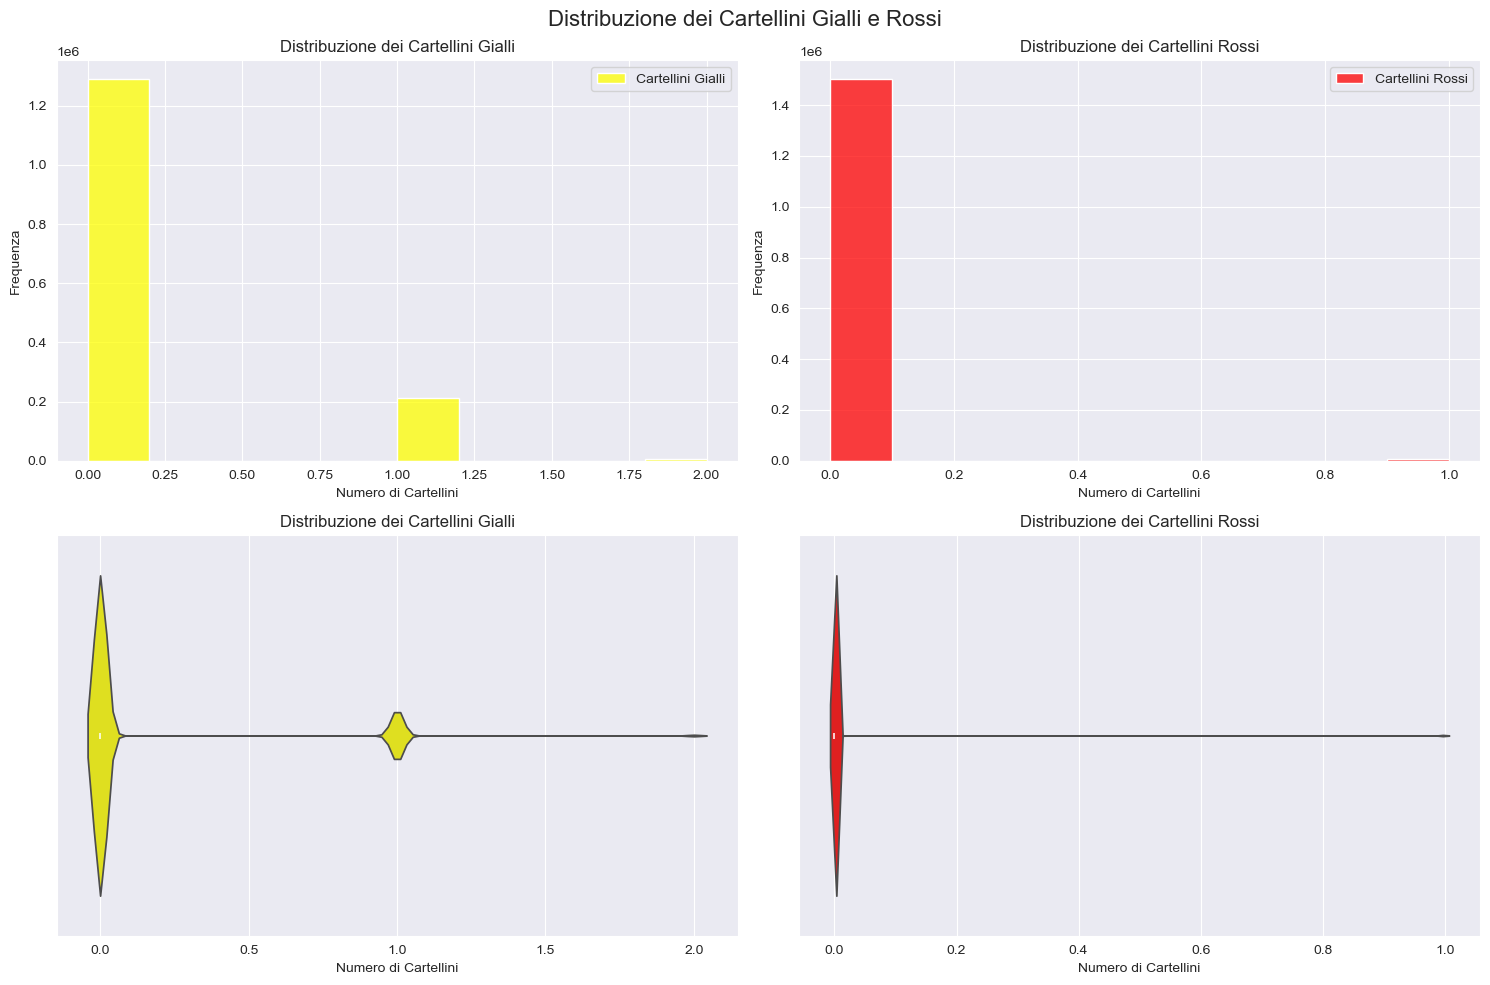

In [9]:
from Utils.AppearancesUtils import plot_cards_distribution

plot_cards_distribution(df)

The **boxplot** below shows the **distribution** of **minutes played** by players for each **competition**.
The **outliers** indicate players who have played a number of minutes **significantly** different from the **average**.


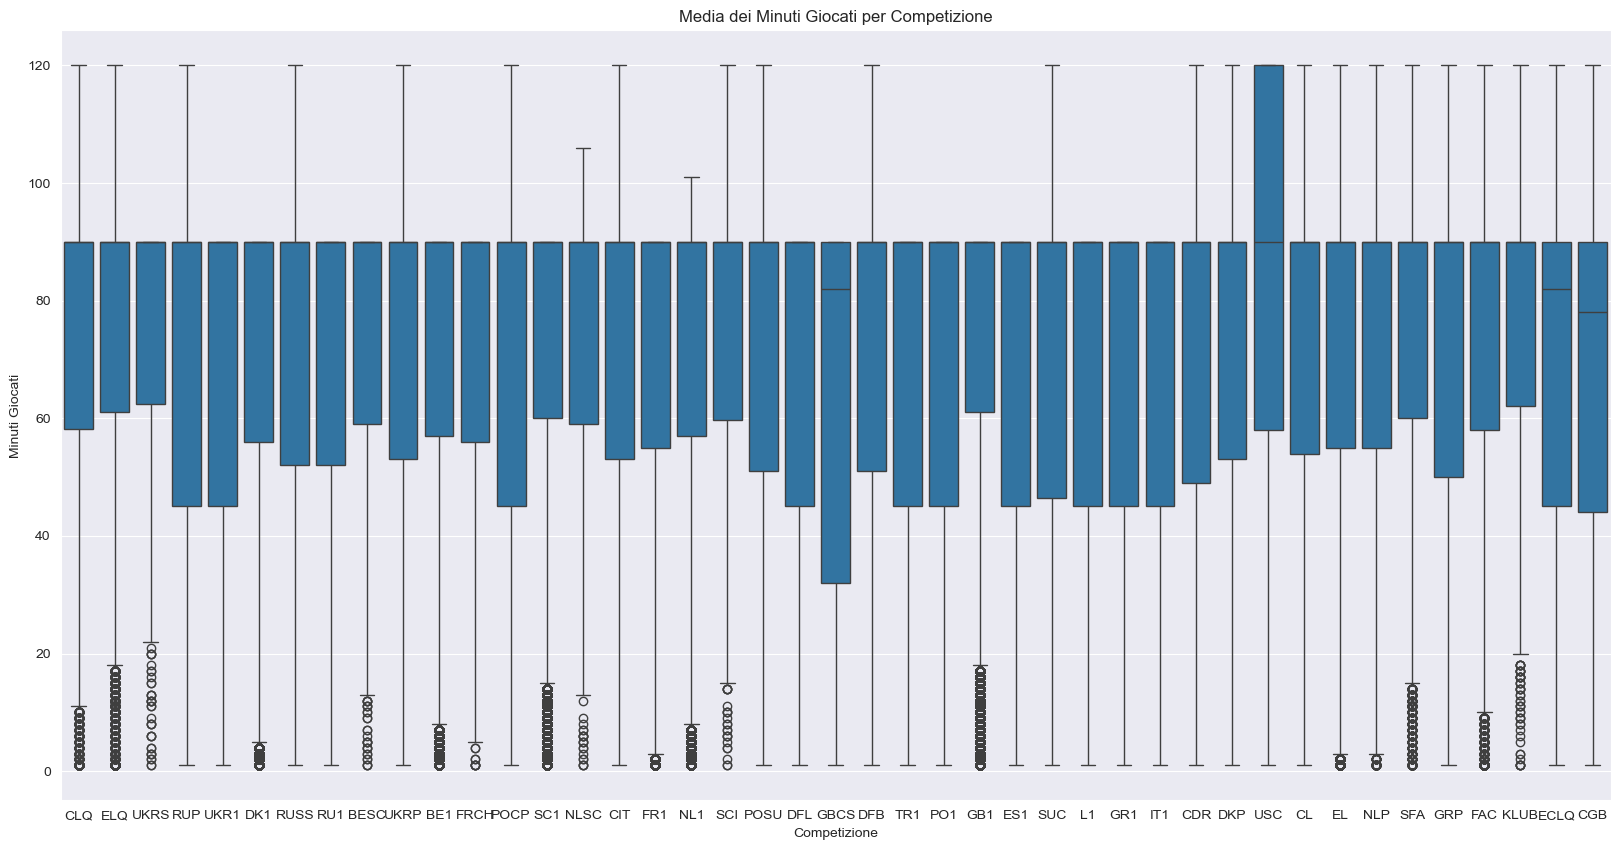

In [10]:
plt.figure(figsize=(20, 10))  
sns.boxplot(x='competition_id', y='minutes_played', data=df)
plt.title('Media dei Minuti Giocati per Competizione')
plt.xlabel('Competizione')
plt.ylabel('Minuti Giocati')
plt.show()

The **bar chart** below shows the **number** of **players** per **competition**.


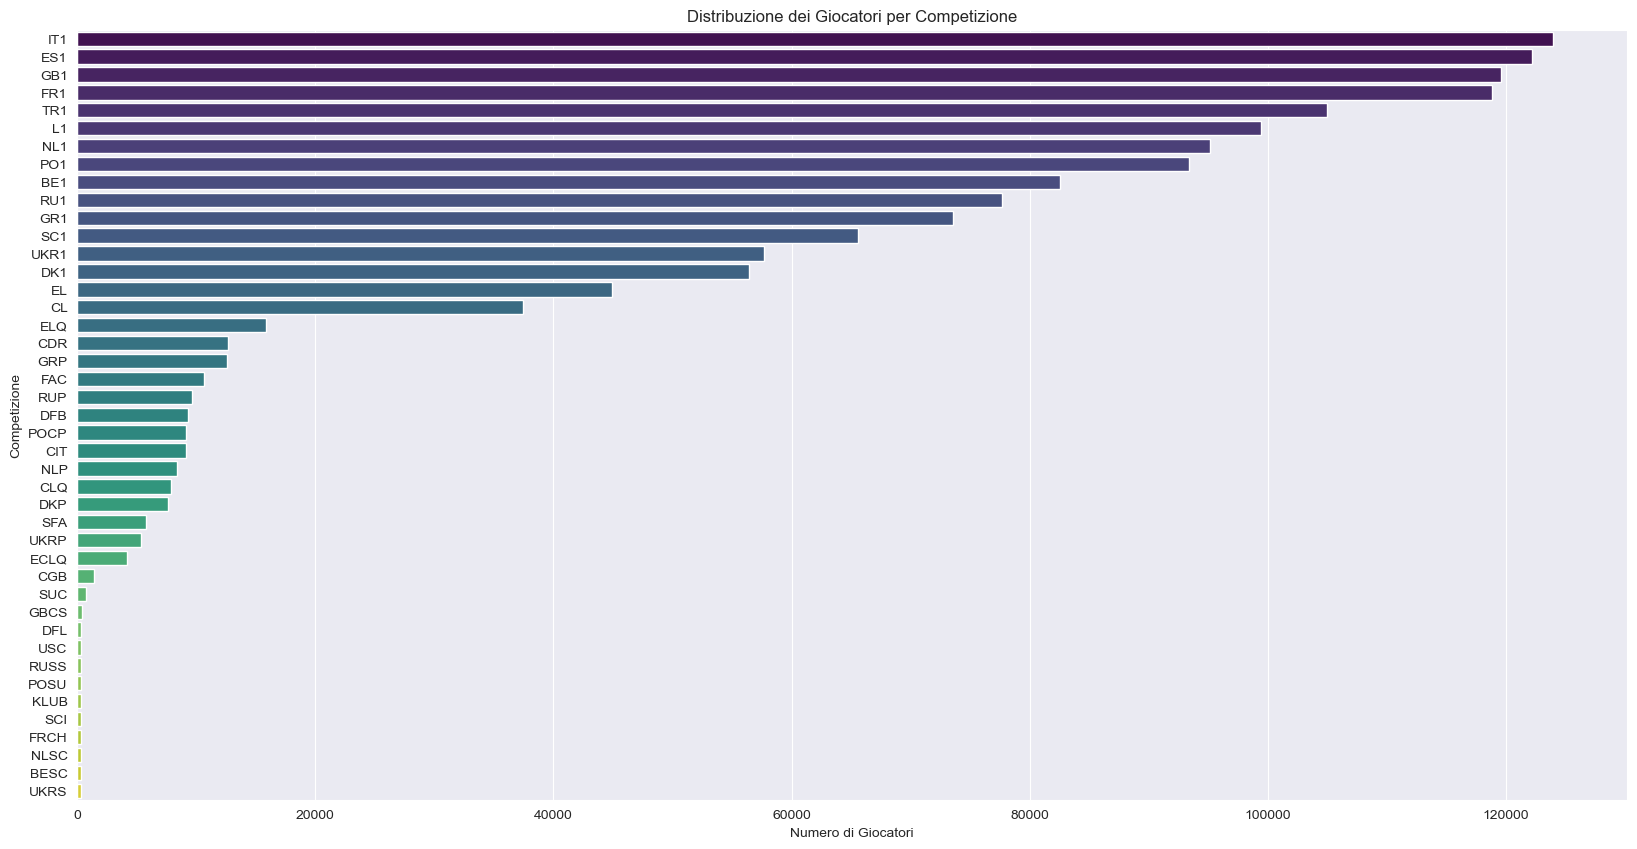

In [11]:
competition_counts = df['competition_id'].value_counts().reset_index()
competition_counts.columns = ['competition_id', 'counts']

plt.figure(figsize=(20, 10))

sns.barplot(x='counts', y='competition_id', data=competition_counts, palette='viridis', hue='competition_id')
plt.title('Distribuzione dei Giocatori per Competizione')
plt.xlabel('Numero di Giocatori')
plt.ylabel('Competizione')
plt.show()


The resulting **chart** shows the **comparison** of **player performances** in terms of **goals** scored, divided by **club**.
This **visualization** is useful for understanding the **distribution** of goals scored by players from different **clubs**.
It is noted that some **clubs** have a **wider distribution** of **goals** scored compared to others,
indicating greater **variation** in **player performances**.


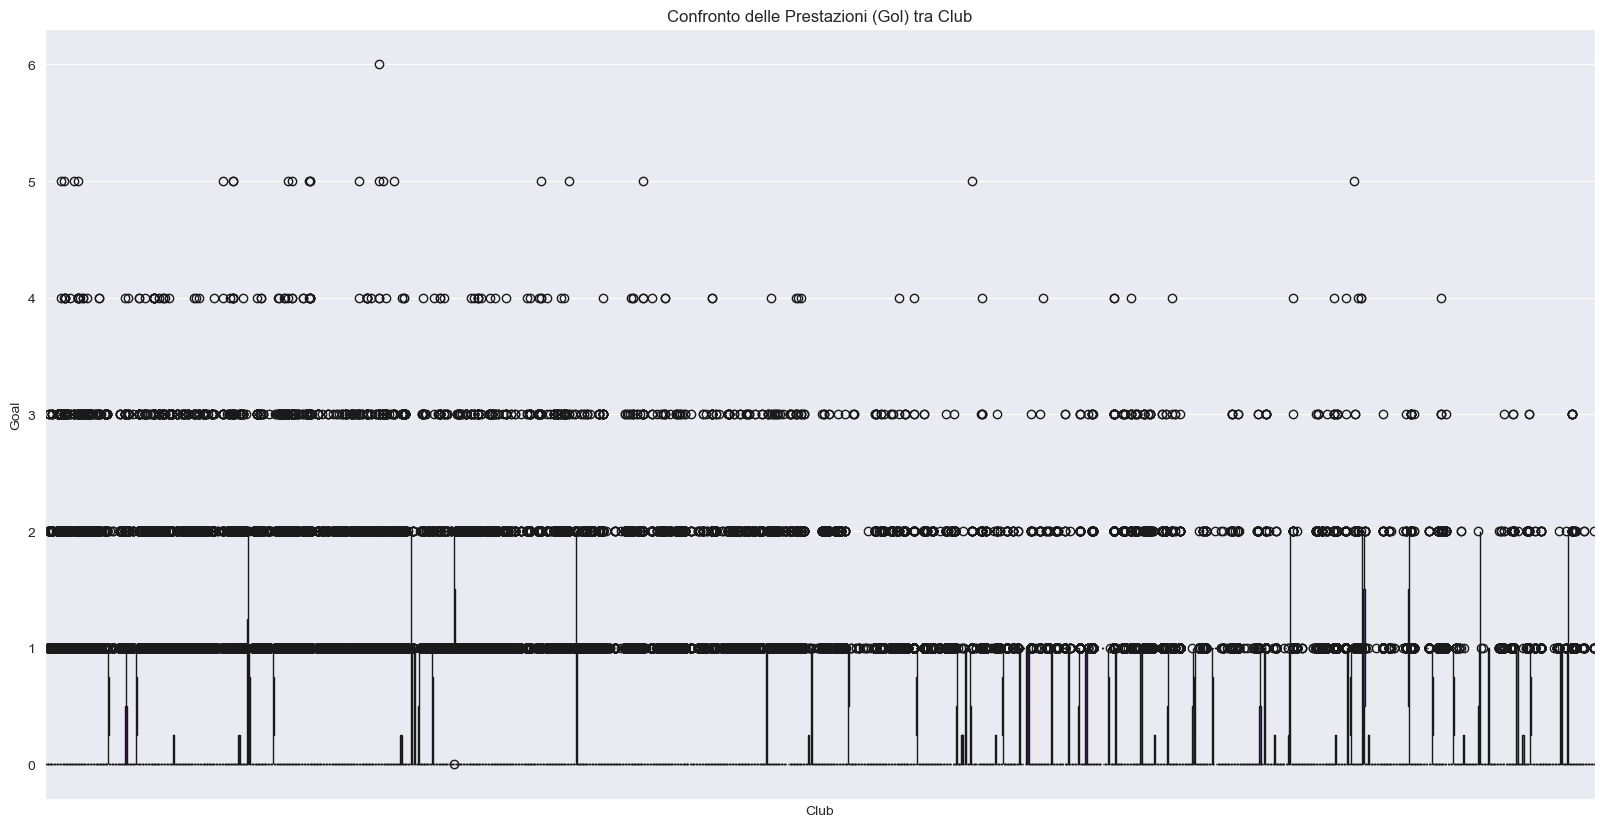

In [12]:
plt.figure(30, figsize=(20, 10))  
sns.boxplot(x='player_club_id', y='goals', data=df, palette='viridis', hue='player_club_id')
plt.title('Confronto delle Prestazioni (Gol) tra Club')
plt.xlabel('Club') 
plt.ylabel('Goal')  
plt.xticks(rotation=90)  
plt.xticks([])  
plt.legend().remove()  
plt.show()


Finally, **visualize** the **frequency** of **cards** by **date** using a **30-day** **moving average**.
This allows us to **visualize** the **trend** of **cards** over time,
and to **identify** any **fluctuations** or **changes** in the **frequency** of these.


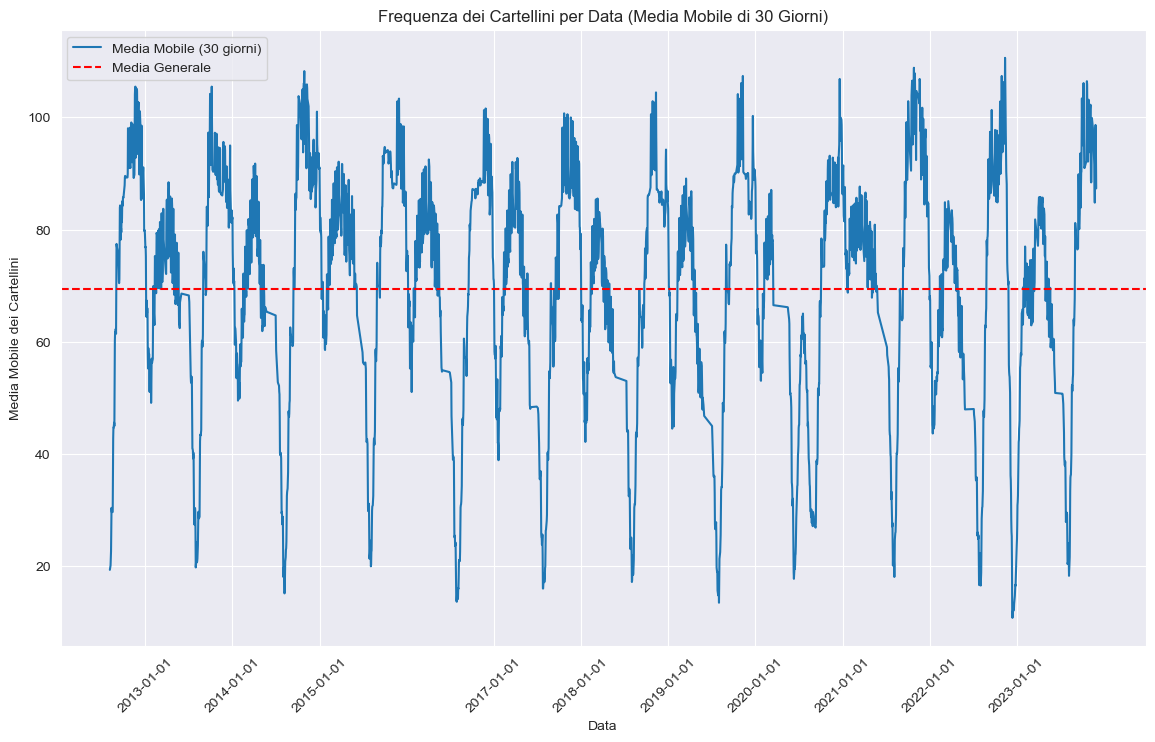

In [13]:
from Utils.AppearancesUtils import plot_card_analysis
plot_card_analysis(df)

plt.legend()
plt.show()